In [1]:
# DSC530-T302
# Stephen Smitshoek
# Week06
# Exercise 8-1 and 8-2

In [2]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

import math
import random
import numpy as np

In [3]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [4]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

In [5]:
def Estimate1(n=7, m=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

In [6]:
def Estimate2(n=7, m=1000):
    """Evaluates S and Sn-1 as estimators of sample variance.

    n: sample size
    m: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('rmse biased', RMSE(estimates1, sigma**2))
    print('rmse unbiased', RMSE(estimates2, sigma**2))


In [7]:
def Estimate3(n=7, m=1000):
    """Evaluates L and Lm as estimators of the exponential parameter.

    n: sample size
    m: number of iterations
    """
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

In [8]:
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
    """Plots the sampling distribution of the sample mean.

    mu: hypothetical population mean
    sigma: hypothetical population standard deviation
    n: sample size
    m: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)

    stderr = RMSE(means, mu)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Save(root='estimation1',
                   xlabel='sample mean',
                   ylabel='CDF',
                   title='Sampling distribution')

In [9]:
def simulate_experiment(n=10, lam=2, m=1000):
    def VertLine(x):
        thinkplot.Plot([x, x], [0, 1], color='0.8', linewidth=3)
    
    L_estimates = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        L_estimates.append(L)
        
    cdf = thinkstats2.Cdf(L_estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(L_estimates, lam)
    
    
    print('The 90% Confidence Interval is {} to {}'.format(round(ci[0], 2), round(ci[1], 2)))
    print('The standard error is {}'.format(round(stderr, 2)))

    VertLine(ci[0])
    VertLine(ci[1])
    thinkplot.Cdf(cdf)

In [10]:
print("m=10")
Estimate1(m=10)
print("\nm=10,000")
Estimate1(m=100000)
print("\nBoth the mean and median trend towards zero as the number of experiements increases, therefore it is"\
     "\nlikley that neither of them are biased.")

m=10
Experiment 1
mean error xbar 0.13822209624935694
mean error median 0.25140235875528316

m=10,000
Experiment 1
mean error xbar 0.002117238023748525
mean error median 0.00301923665666006

Both the mean and median trend towards zero as the number of experiements increases, therefore it is
likley that neither of them are biased.


In [11]:
Estimate2()
print("\nBoth S^2 and S(n-1)^2 yield similar results with S^2 being slightly smaller.")

Experiment 2
rmse biased 0.5008320018577254
rmse unbiased 0.5570055288254314

Both S^2 and S(n-1)^2 yield similar results with S^2 being slightly smaller.


The 90% Confidence Interval is 1.3 to 3.62
The standard error is 0.78


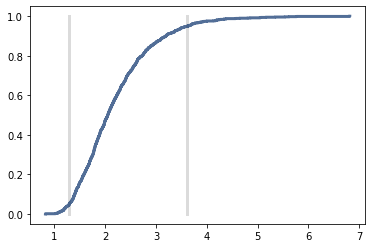

In [12]:
simulate_experiment(n=10)

The 90% Confidence Interval is 1.7 to 2.37
The standard error is 0.2


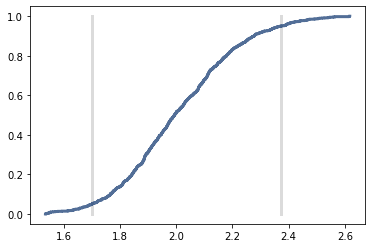

In [13]:
simulate_experiment(n=100)

The 90% Confidence Interval is 1.9 to 2.1
The standard error is 0.06


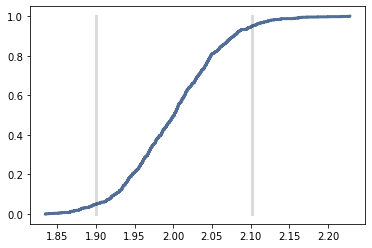

In [14]:
simulate_experiment(n=1000)